# Comparing Classification Models: sklearn Iris data

# Disclaimers
## Authorship 

This notebook has been prepared by **Hammad Zahid Ali** and modified to cope with the purpose of this class. Main modifications were inclusion of extra documentation of the functions and chunks of code, inclusions of references to 3rd part resources. If you are interested on the original file, please have a look at:
https://www.kaggle.com/hammadzahidali/comparing-classification-models-sklearn-iris-data all credits should be given to [**Hammad Zahid Ali**](https://www.kaggle.com/hammadzahidali) for his great work. 

## Liability

The material and information contained on this notebook is for general information and educational purposes only. You should not rely upon the material or information on the notebook as a basis for making any business, legal or any other decisions.

I am not be liable for any false, inaccurate, inappropriate or incomplete information presented on the notebook. Any reliance you place on such material is therefore strictly at your own risk.

## Datasets license

The **Iris Species** used in this notebook was obtained at Kaggle and originally published by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris) no personal data that could be used to identify the subjects were included on the dataset.

Sincerely,

**Adriano Barbosa**

**Steps in Applied Machine Learning:**
- Load Library
- Load Dataset to which Machine Learning Algorithm to be applied Either a) load from a CSV file or b) load from a Database
- Summarisation of Data to understand dataset (Descriptive Statistics)
- Visualisation of Data to understand dataset (Plots, Graphs etc.)
- Data pre-processing & Data transformation (split into train-test datasets)
- Application of a Machine Learning Algorithm to training dataset a) setup a ML algorithm and parameter settings b) cross validation setup with training dataset
c) training & fitting Algorithm with training Dataset
d) evaluation of trained Algorithm (or Model) and result
e) saving the trained model for future prediction
- Finalise the trained modela and make prediction

In [1]:
# Install the packages below to make sure you have all you need.
#!pip install -U pandas
#!pip install -U sklearn 
#!pip install -U matplotlib
#!pip install -U pprint
#!pip install -U pickle

Requirement already up-to-date: pandas in /Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages (0.25.1)
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: sklearn in /Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages (0.0)
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: matplotlib in /Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages (3.1.1)
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: pprint in /Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages (0.1)
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --

# 1) Load Libraries

We will use the following libraries to conduct this practical
### Pandas
**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal. [Learn more](https://pandas.pydata.org/pandas-docs/stable/)

### Numpy
**NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

  * a powerful N-dimensional array object
  * sophisticated (broadcasting) functions
  * tools for integrating C/C++ and Fortran code
  * useful linear algebra, Fourier transform, and random number capabilities [Learn more](https://numpy.org/)
  
### Pickle
The **pickle** module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”. [Learn more](https://docs.python.org/3/library/pickle.html)

### Sklearn
**Scikit-learn** is a Python module integrating a wide range of state-of-the-art machine learning algorithms for medium-scale supervised and unsupervised problems. This package focuses on bringing machine learning to non-specialists using a general-purpose high-level language. Emphasis is put on ease of use, performance, documentation, and API consistency. It has minimal dependencies and is distributed under the simplified BSD license, encouraging its use in both academic and commercial settings.  [Learn more](https://scikit-learn.org/stable/index.html)

In [57]:
import pandas as pd
import numpy as np
import pickle as pk
from pprint import pprint

# for dataset spliting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

# for the cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

# others
from sklearn.datasets import load_digits




**IRIS data From UCI Machine Learning**
The goal of this exercise is to correctly classify each flower given its attributes. IRIS is a small and well understood dataset for classification problem. Here the author is going to present an end to end predictive modelling machine learning recipe for this classification project using different types of Classifier available in scikit-learn package such as Logistic Regression, Linear Discriminant Analysis, K Nearest Neighbours, Decision Tree, Naïve Bayes and Support Vector Machine.



In [58]:
# 2 LOAD DATA

data = pd.read_csv('./Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
# 3 Summarization of dataset: Descriptive Stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [60]:
# checking if any null values 
data.isnull().values.any()

False

In [61]:
# Print the classes of target col 'Species'
class_names=data['Species']
print (class_names.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [62]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

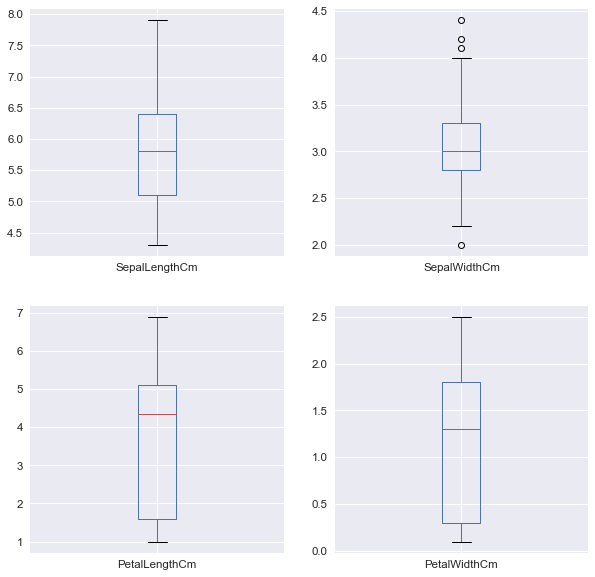

In [63]:
# 4 Data visualization

col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

data[col_names].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,  figsize = (10,10))
plt.show()

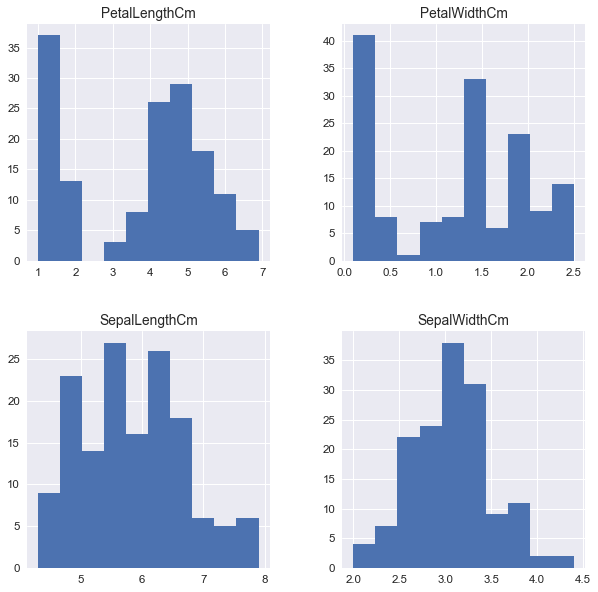

In [64]:






 
plt.show()

## Draw a matrix of scatter plots.
We will use [scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) to plot a set of scater plots for each variable.

* **Used Parameters**:<br>
 * **figsize** : (float,float), optional, a tuple (width, height) in inches;<br>
 * **diagonal** : {‘hist’, ‘kde’}, pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal

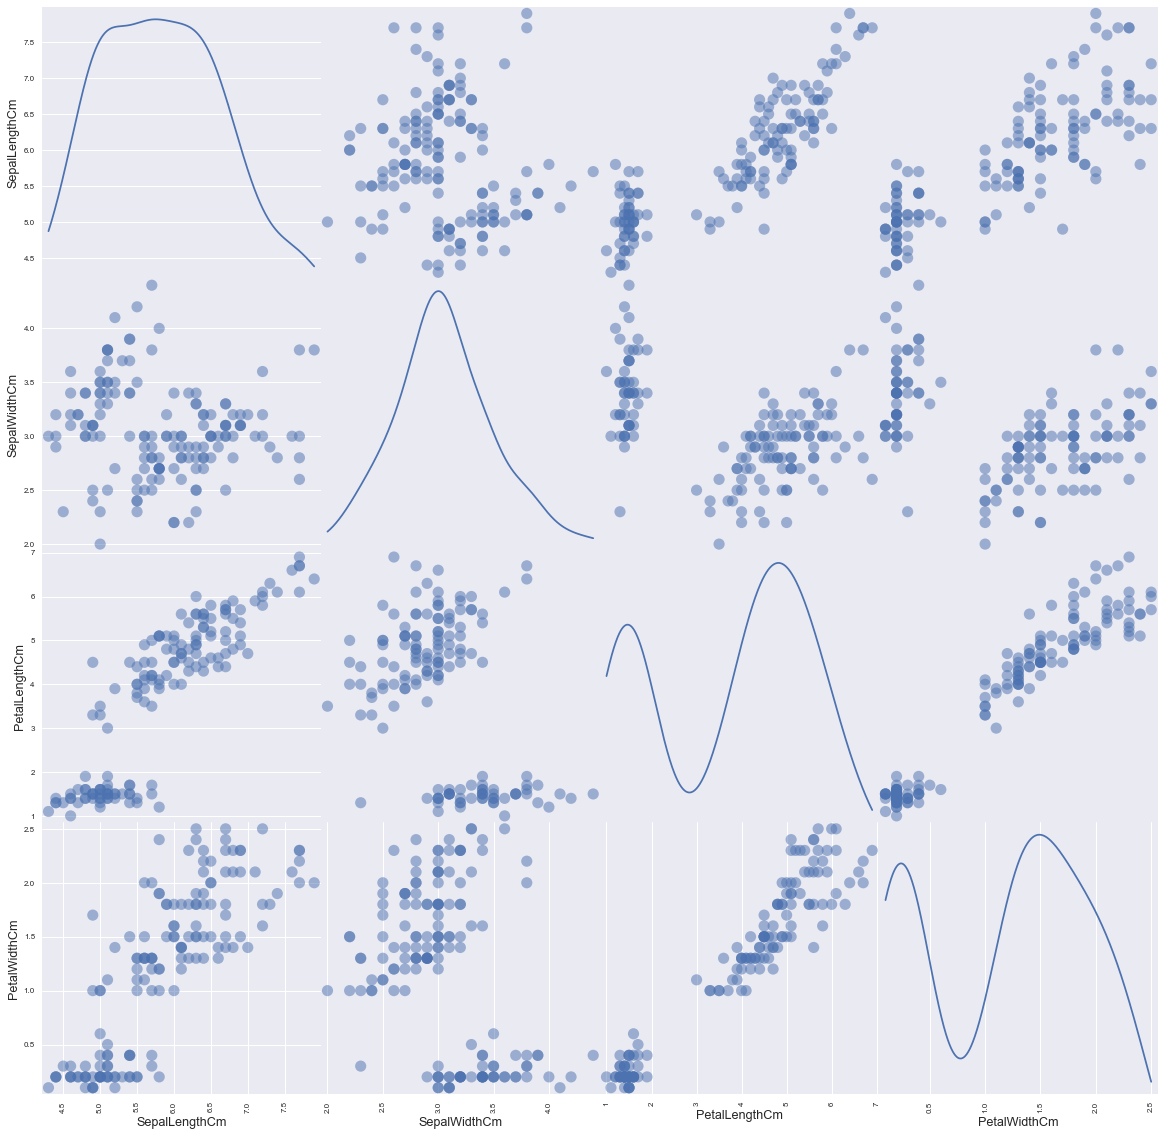

In [65]:
scatter_matrix(data[col_names],figsize=(20,20), diagonal='kde',s=500)
plt.show()

## Plot pairwised plots for the species with Seaborn
[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**pairplot** plots pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.<br>[Learn more](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

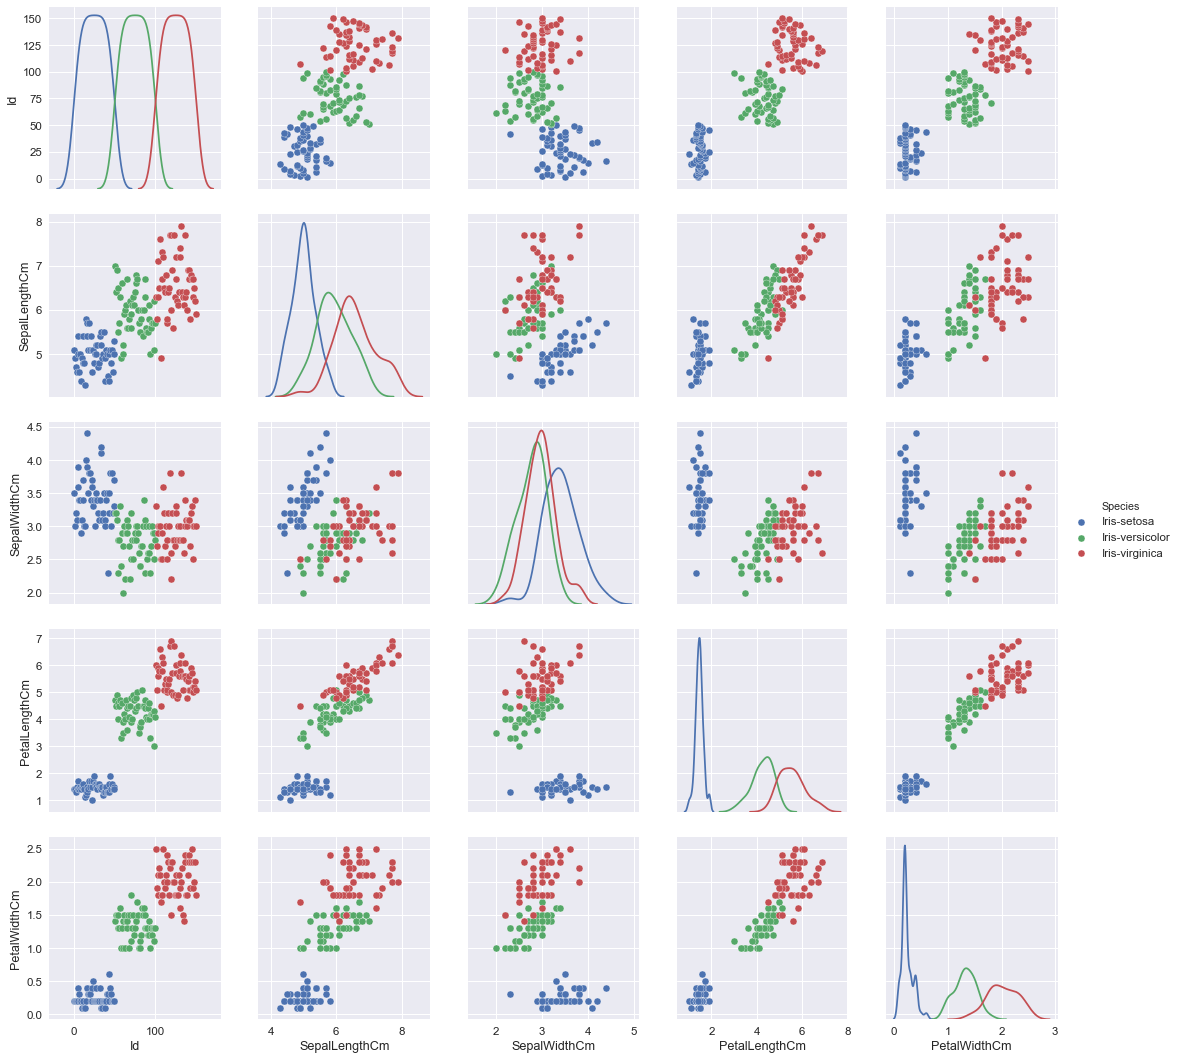

In [66]:
#This plots pairwise relationships in a dataset.
img=sns.pairplot(data, hue = "Species", size=3, diag_kind="kde")

## Plot pairwised plots for the species with Corr
The Pandas function **corr** computes pairwise correlation of columns, excluding NA/null values. [Learn more](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

The Seaborn function **heatmap** plots rectangular data as a color-encoded matrix. [Learn more](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

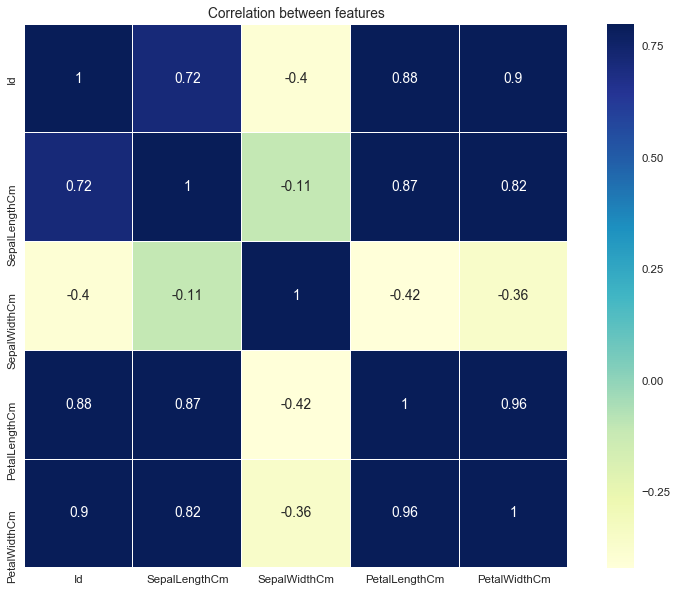

In [67]:
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## Split the dataset into train and test sets

In scikit-learn a random split into training and test sets can be quickly computed with the **train_test_split** helper function.

It allow to quickly sample a training set while holding out 33% of the data for testing (**evaluating**) our classifier.

In [68]:
# Here, a Data preprocessing function was defined in order to faciliate the unsdertanding

def pre_processing(data):
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']
    
    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest
    

In [69]:
# 4 Data preprocessing, here the aboce function was applied
xtrain,xtest, ytrain, ytest = pre_processing(data)

## Computing cross-validated metrics

This step is also known as **model training**, where from the training dataset the selected modeling method, lets say Logistic regression, will _learn_ from the training dataset. 

This is done by splitting the train data, fitting a model and computing the **accuracy** score 5 consecutive times (with different splits each time):

**cross_val_score**(model, xtrain, ytrain, **cv** = 3, **scoring**='accuracy', **n_jobs** = -1, **verbose** = 0)

* Used parameters
 * cv, Determines the cross-validation splitting strategy: **3 splits**
 * scoring, Scoring parameter: **accuracy** ;<br> 
  a) For the most common use cases, you can designate a scorer object with the scoring parameter; all scorer objects follow the convention **that higher return values are better than lower return values**. [Learn more](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 
<br>
 * n_jobs, the number of CPUs to use to do the computation: -1 means using all processors.
 * verbose, determine the messages displayed in their output, we use the lowest one for simplecity.
 
 Complete documentation about the cross_val_score module can be found at the scikit-learn [Learn more](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

In [70]:
#here the cv value is the defaulf 3-fold cross-validation,
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Model name: LR ; Cross-validation accuracy:  0.9509803921568628


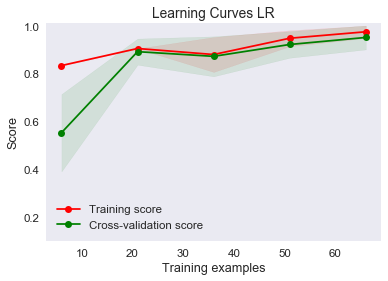

Model name: CART ; Cross-validation accuracy:  0.9301470588235294


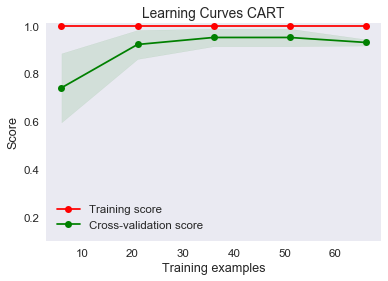

Model name: KNN ; Cross-validation accuracy:  0.9699754901960785


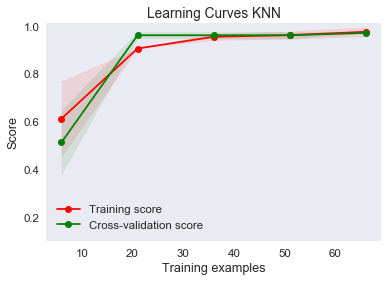

Model name: NB ; Cross-validation accuracy:  0.9705882352941176


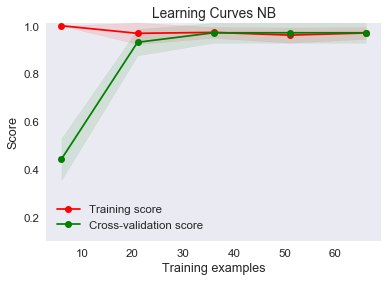

Model name: LDA ; Cross-validation accuracy:  0.9607843137254902


/Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/adriano.barbosa/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


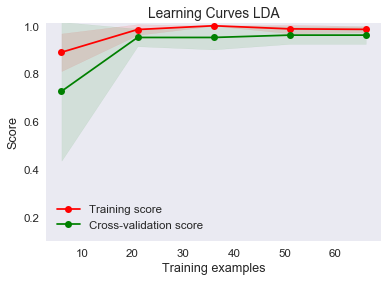

Model name: SVM ; Cross-validation accuracy:  0.9705882352941176


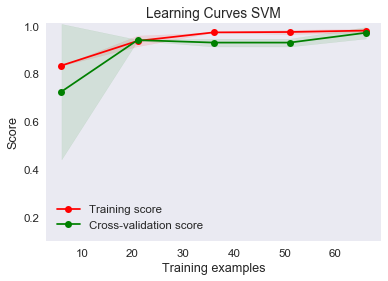

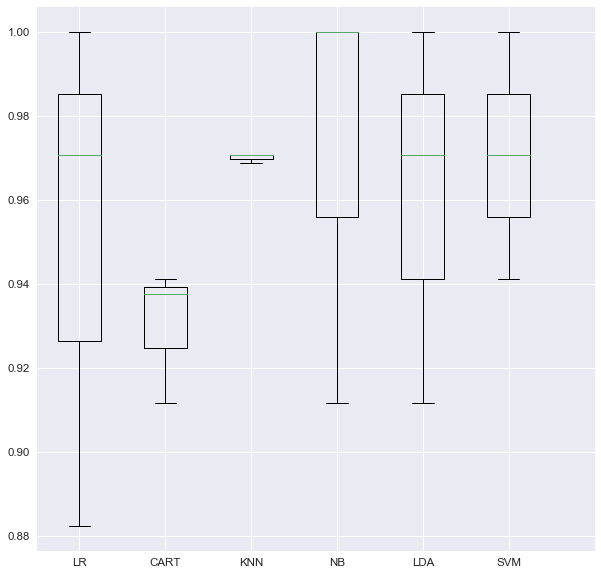

In [72]:
# Building Models for iris flower classification

#This line keeps the replroducible state of the ramdomization.
np.random.seed(1000)

#This makes a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    #Here the classification algorithms are selected from the sklearn.linear_model module;
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) ) 
    

    #This saves the results of the modelling for the boxplot at the end of the block
    modeloutcomes = []
    #This saves the name of the models for plotting at the end of the block
    modelnames = []
    
    #Now, we start with the cross-valudation. Note that this is a FOR loop, 
    #where every iteration, a different algorithm is used to train the model
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False), 
                                    scoring='accuracy', n_jobs = -1, verbose = 0)
        #This will print the name of the model and the Accuracy score obtained durin the cross-validation
        print('Model name:',name,'; Cross-validation accuracy: ',v_results.mean())
        
        #This will save the results and the name of the model to print in the boxplot
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
        #### Plot the learning curves
        title = "Learning Curves "+name
        cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
        
        plot_learning_curve(model, title, xtrain, ytrain, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

        plt.show()
        ####
        
    #This will print the total results of the cross validation if you're interested to look at 
    #print(modeloutcomes)
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)

    plt.boxplot(modeloutcomes)
    plt.xticks([1, 2, 3, 4, 5, 6, 7], modelnames)

    
#This is where the above function is applied agains the splitted dataset: xtrain,xtest, ytrain, ytest.     
classification_Models(xtrain,xtest, ytrain, ytest)

In [39]:
# This allows to print the different parameters used by each model
pprint(models)

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')),
 ('NB', GaussianNB(priors=None)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001

## Fitting the model

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

The **clf** (for classifier) estimator instance is first fitted to the model; that is, it must learn from the model. This is done by passing our training set to the **fit( )** method. [Learn more](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) 

In the example below, **trainedmodel = clf.fit(xtrain,ytrain)** uses:
* _xtrain_, this represents the **features** of the samples that we use for training.
* _ytrain_, this represents the **classes** of the samples that we use for training.
* _trainedmodel_, this is the resulting model.

The **ypredict = trainedmodel.predict(xtest)**, uses:

* _xtest_, this represents the **features** of the samples that we want to predict.
* _ypredict_, are the **classes** of the samples that we want to predict.

### Accuracy
The **accuracy_score** function computes the accuracy, if the entire set of predicted labels for a sample strictly match with the true set of labels, then the accuracy is 1.0; otherwise it is 0.0. [Learn more](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)

### Classification report
The **classification_report** function builds a text report showing the main classification metrics. [Learn more](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

### Confusion matrix
The **confusion matrix** is used to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. [Learn more](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Before we start with the prediction, we will define the function **plot_confusion_matrix** which will enable us to plot the confusion matrix in a more friendly way.

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    #fig = plt.figure()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           xticklabels=class_names.unique(), yticklabels=class_names.unique(),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    #return ax
    

## Pedicting the model
Now that we defined _Accuracy_, _Classification Report_ and _Confusion matrix_, let's process with the **Prediction and Evaluation** of the model using the **test samples** encoded in the data frame **xtest**, but first remember that on this variable, only the features of the samples are described, and not the classes that each sample belongs. This information is encoded on the variable **ytest**.

In [41]:
#This displays the FEATURES of the test samples
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1
44,5.1,3.8,1.9,0.4
68,6.2,2.2,4.5,1.5
28,5.2,3.4,1.4,0.2
49,5.0,3.3,1.4,0.2


In [42]:
#This displays the CLASSES of the test samples, what we actually want to predict.
ytest.head()

98    Iris-versicolor
44        Iris-setosa
68    Iris-versicolor
28        Iris-setosa
49        Iris-setosa
Name: Species, dtype: object


****************************LR
The accuracy: 0.92
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.76      0.87        17
 Iris-virginica       0.84      1.00      0.91        21

    avg / total       0.93      0.92      0.92        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 13  4]
 [ 0  0 21]]


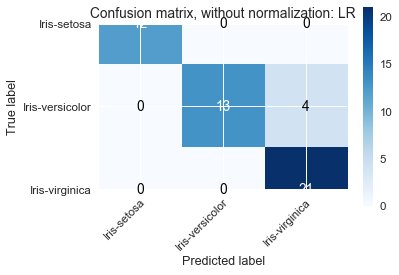


****************************CART
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.95      0.90      0.93        21

    avg / total       0.94      0.94      0.94        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 16  1]
 [ 0  2 19]]


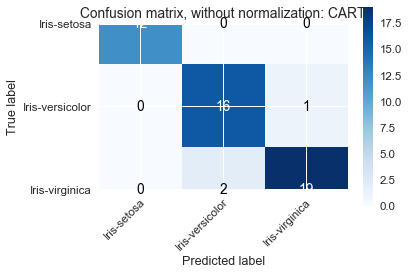


****************************KNN
The accuracy: 0.98
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.95      0.98        21

    avg / total       0.98      0.98      0.98        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 17  0]
 [ 0  1 20]]


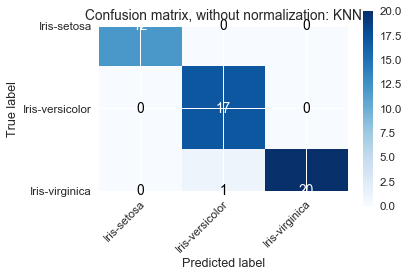


****************************NB
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.95      0.90      0.93        21

    avg / total       0.94      0.94      0.94        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 16  1]
 [ 0  2 19]]


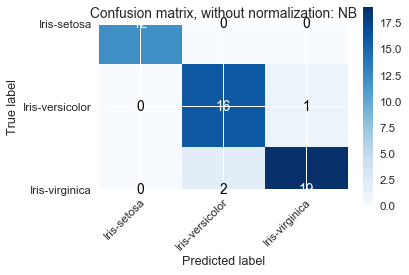


****************************LDA
The accuracy: 0.96
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.95      0.95      0.95        21

    avg / total       0.96      0.96      0.96        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 16  1]
 [ 0  1 20]]


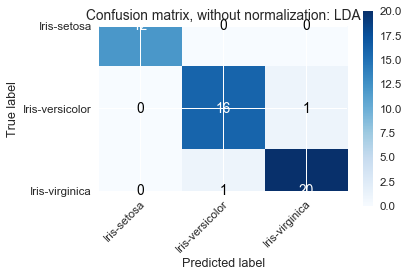


****************************SVM
The accuracy: 0.96
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.90      0.95        21

    avg / total       0.96      0.96      0.96        50

Confusion matrix, without normalization
[[12  0  0]
 [ 0 17  0]
 [ 0  2 19]]


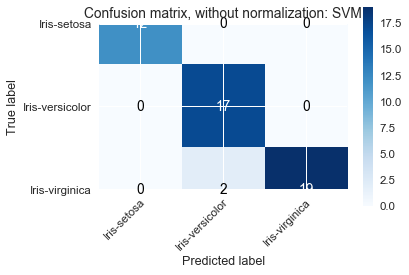

In [73]:
# Evaluating and predicting models
for name,clf in models:
    # This fits the classifier (clf, the method) to the training data to create a model (trainedmodel).
    trainedmodel = clf.fit(xtrain,ytrain)
    
    # This applies the model to the unseen data (xtest), which are the features of the samples we want to predict,
    # and return ypredict which is the classed that the sample was predicted.
    ypredict = trainedmodel.predict(xtest)
    
    # The function accuracy_score returns the accuracy of the prediction. Don't mix that up with the accuracy of the cross-validation that we calculated on the previous step.
    acc = accuracy_score(ytest,ypredict)

    # This saves the classification_report of the prediction
    classreport = classification_report(ytest,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    
    #This asks the function above in order to plot the confusion matrix
    plot_confusion_matrix(ytest, ypredict, classes=class_names, title='Confusion matrix, without normalization: '+name)
    

    # If you're interested to save the trained model (trainedmodel), un-comment the lines below:
    #import pickle as pk
    #with open('model_'+name+'.pickle','wb') as f:
        #pk.dump(trainedmodel,f)
    